In [178]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from graphviz import Source
# Load dataset and drop columns that are not important; also drop all the missing values
df = pd.read_csv(r"C:\Users\benja\OneDrive\Documents\Classes\Machine Learning\Project 2\daniel_test.csv")
df = df.drop(columns = [ 'country', 'year', 'latent_rugged_ext'], axis = 1)
df_filled = df.dropna()

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_filled)

# Convert the standardized data back to a DataFrame
df_filled = pd.DataFrame(standardized_data, columns=df.columns)
# print(df_filled.describe())
Y = df_filled['gini_disp_ext']
X = df_filled.drop('gini_disp_ext', axis = 1)

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=7)
model = DecisionTreeRegressor(random_state = 30, max_depth = 3)
model.fit(X_train, y_train)


# Make predictions on the training set
y_pred_train = model.predict(X)

# Calculate the Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(Y, y_pred_train)
print("Mean Squared Error on Training Data:", mse_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

# Get the R-squared on the test set
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

Mean Squared Error on Training Data: 0.20737987247672604
Mean Squared Error on Test Data: 0.15831434511597245
R-squared: 0.8245990819962846


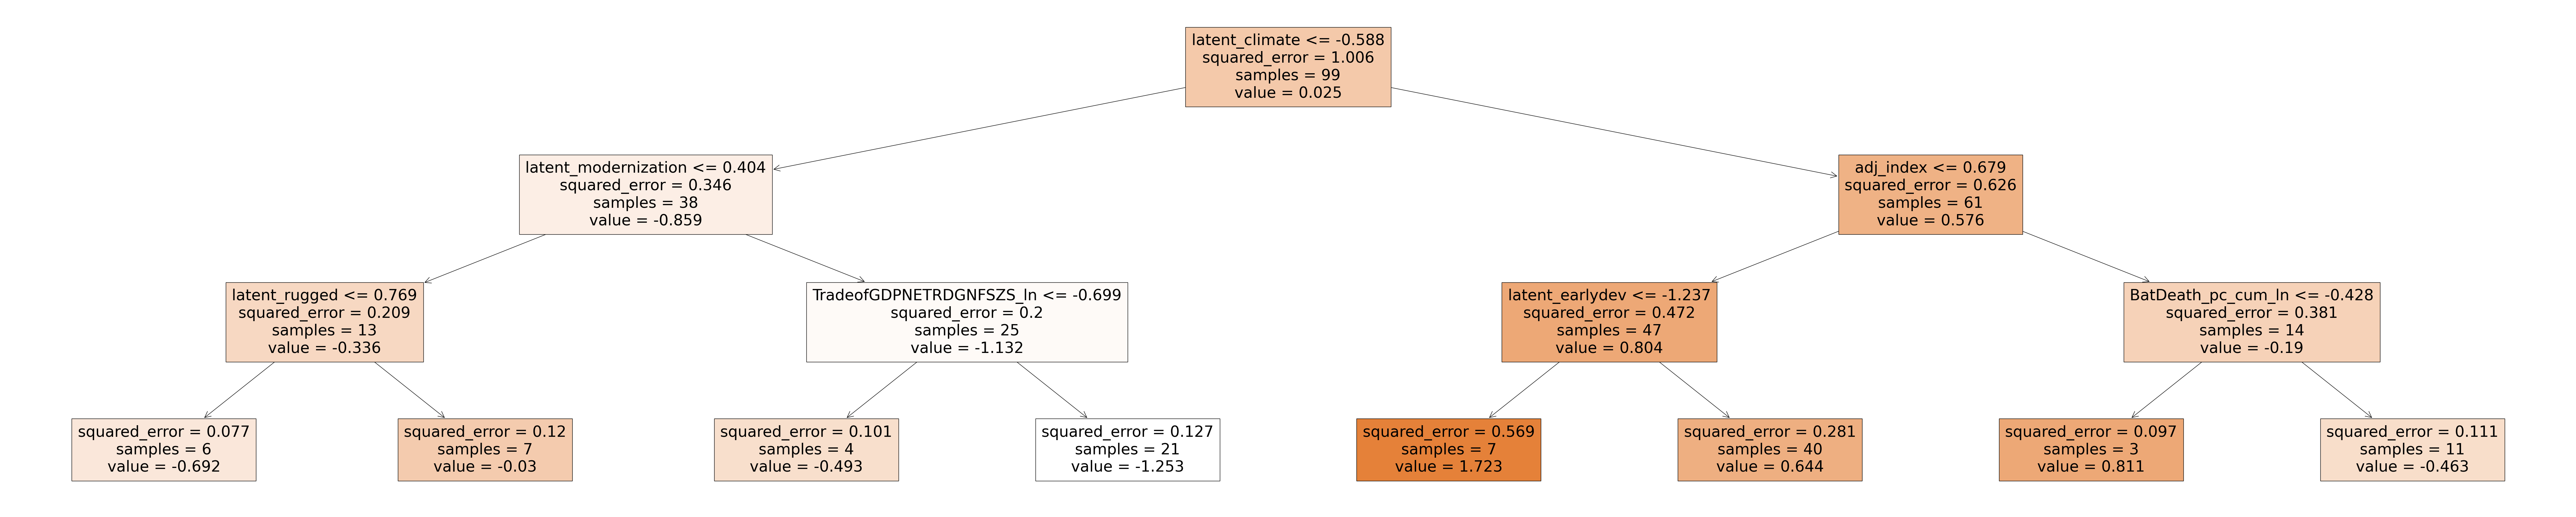

In [170]:
# Display the decision tree
plt.figure(figsize=(100, 20))
plot_tree(model, feature_names = X.columns,  filled = True)
plt.savefig('Inequality Regression Decision Tree.png')  
plt.show()